<a href="https://colab.research.google.com/github/brenbuonincon/IntroPythonCD/blob/main/graficos_GOCC_GOBP_SAP_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkx matplotlib pandas scikit-learn openpyxl

In [ ]:
# librerias
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import math
from matplotlib.colors import LinearSegmentedColormap
import textwrap

/tmp/ipython-input-2508696110.py:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.05, 0.05, 0.80, 0.95])


Gráfico de barras final generado: 'grafico_subcelular_estetico_final_con_cbar.png'


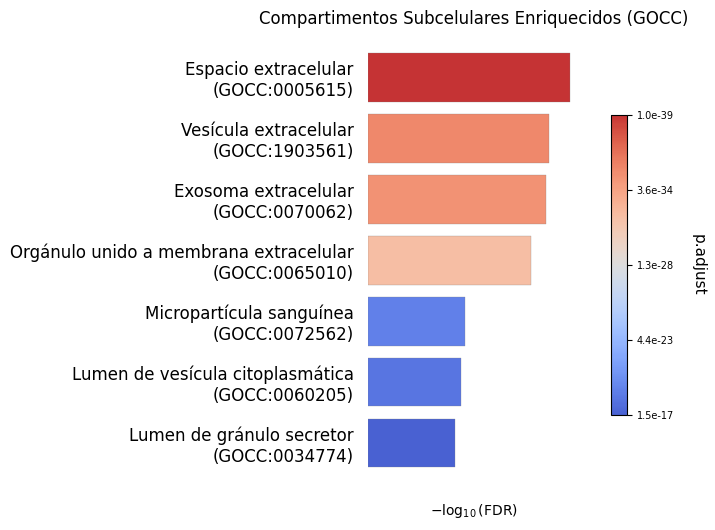

In [ ]:
# grafico de barras
# terminos GO celLular compartments
# cada proceso GO traducido + su codigo

# fuente
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 12

# diccionario de traduccion (poster en español) terminos GO
TRADUCCION = {
    'Extracellular exosome': 'Exosoma extracelular',
    'Extracellular vesicle': 'Vesícula extracelular',
    'Blood microparticle': 'Micropartícula sanguínea',
    'Extracellular membrane-bounded organelle': 'Orgánulo unido a membrana extracelular',
    'Cytoplasmic vesicle lumen': 'Lumen de vesícula citoplasmática',
    'Extracellular space': 'Espacio extracelular',
    'Secretory granule lumen': 'Lumen de gránulo secretor'
}

# cargar datos
data = {
    'GOCC': ['GOCC:0070062', 'GOCC:1903561', 'GOCC:0072562', 'GOCC:0065010', 'GOCC:0060205', 'GOCC:0005615', 'GOCC:0034774'],
    'Descripción': [
        'Extracellular exosome', 'Extracellular vesicle', 'Blood microparticle', 'Extracellular membrane-bounded organelle', 'Cytoplasmic vesicle lumen', 'Extracellular space', 'Secretory granule lumen'
    ],
    'count_in_network': [35, 37, 17, 34, 20, 48, 19],
    'false_discovery_rate': [
        4.01e-35, 8.99e-36, 1.99e-19, 3.02e-32, 9.91e-19, 1.04e-39, 1.52e-17
    ]
}

df_subcellular = pd.DataFrame(data)

# preprocesamiento y crear columnas
df_subcellular['neg_log10_fdr'] = -np.log10(df_subcellular['false_discovery_rate'])

# etiquetas del grafico traducidas al español + GOCC:Codigo
df_subcellular['Etiqueta_GO'] = df_subcellular.apply(
    lambda row: f"{TRADUCCION.get(row['Descripción'], row['Descripción'])}\n({row['GOCC']})", axis=1)

# ordenarlos de mayor a menor (-log10(FDR))
df_plot = df_subcellular.sort_values(by='neg_log10_fdr', ascending=False).reset_index(drop=True)

# grafico de barras (colores azul y rojo suaves con coolwarm)
fig, ax = plt.subplots(figsize=(8, 6))
cmap_base = plt.cm.coolwarm
# azul abajo del grafico queda mejor, genero rango para la suavidad
cmap_values = cmap_base(np.linspace(0.05, 0.95, 256))
cmap_custom = LinearSegmentedColormap.from_list('CustomCoolWarmClean', cmap_values)
cmap = cmap_custom

# normalizar datos
norm = plt.Normalize(df_plot['neg_log10_fdr'].min(), df_plot['neg_log10_fdr'].max())

# graficar
bars = ax.barh(
    df_plot['Etiqueta_GO'],
    df_plot['neg_log10_fdr'],
    color=cmap(norm(df_plot['neg_log10_fdr'])),
    edgecolor='gray',
    linewidth=0.2
)

# etiquetas y titulo de la figura
ax.set_xlabel(r'$-\log_{10}(\mathrm{FDR})$', fontsize=10, labelpad=10) # eje X
ax.set_title('Compartimentos Subcelulares Enriquecidos (GOCC)', fontsize=12)

# eliminar recuadros de fondo, dejar la figura limpia con ejes necesarios
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# invertir el eje Y para que el mayor valor (mayor significancia) quede arriba
ax.invert_yaxis()

# eliminar tics del eje X
ax.tick_params(axis='x', length=0)
ax.set_xticks([])

# eliminar etiqueta del eje Y, dejar solo las etiquetas de los ticks
ax.set_ylabel('')
ax.tick_params(axis='y', length=0, pad=10)

# ajustar longitud de las barras
min_fdr_val = df_plot['neg_log10_fdr'].min()
max_fdr_val = df_plot['neg_log10_fdr'].max()
ax.set_xlim(0, max_fdr_val * 1.05)

# barra de referencias
sm.set_array(df_plot['neg_log10_fdr'])

cbar_ax = fig.add_axes([0.82, 0.25, 0.02, 0.5])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical')

# ocultar el label principal del colorbar
cbar.set_label('', rotation=270, labelpad=15)

# tics con notacion cientifica y tamaño pequeños
cbar_ticks = np.linspace(df_plot['neg_log10_fdr'].min(), df_plot['neg_log10_fdr'].max(), 5)
cbar.set_ticks(cbar_ticks)

# etiquetas de los ticks de la barra de color
cbar.set_ticklabels([f'{10**(-t):.1e}' for t in cbar_ticks], fontsize=7)

# añadir etiqueta "p.adjust" o "-log10(FDR)" en el lateral de la barra de color
cbar_ax.text(cbar_ax.get_position().x1 + 0.08, 0.5, 'p.adjust',
             transform=fig.transFigure, fontsize=11, rotation=270, va='center')

plt.tight_layout(rect=[0.05, 0.05, 0.80, 0.95])
plt.savefig('grafico_subcelular_estetico_final_con_cbar.png', dpi=300)
print("Gráfico de barras final generado: 'grafico_subcelular_estetico_final_con_cbar.png'")

/tmp/ipython-input-1608285044.py:67: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 0.5, 0.9])


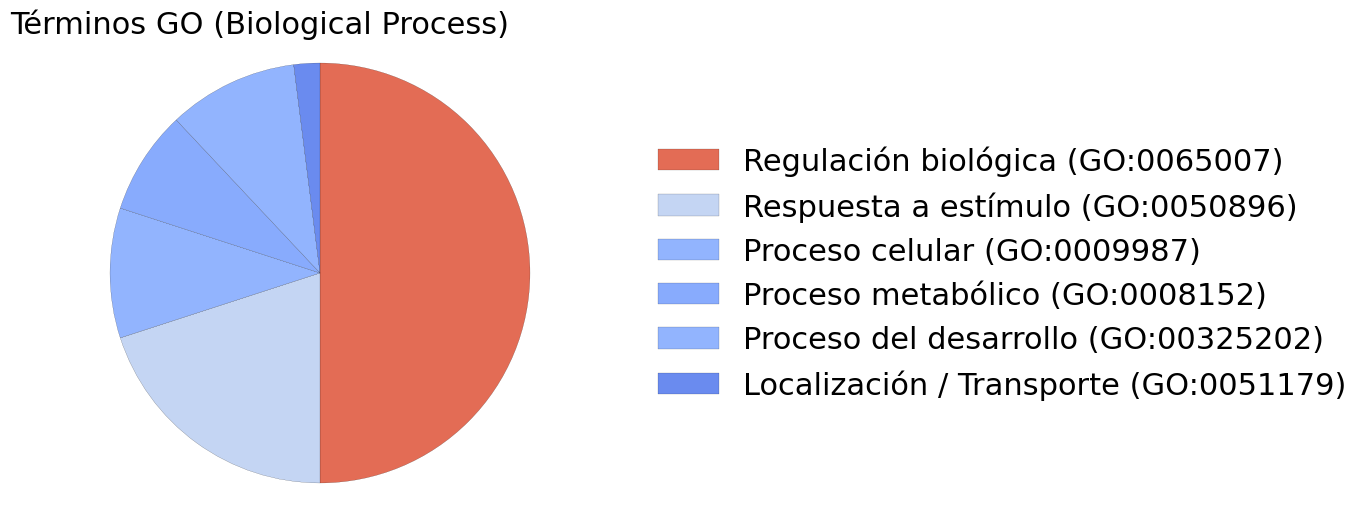

In [ ]:
# grafico de torta
# terminos GO biological processes
# con cuadro de referencias con proceso + codigo GO

# fuente
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 12

# datos y etiquetas del grafico
labels = [
    'Regulación biológica (GO:0065007)', # los terminos GO fueron previamente traducidos en celda anterior
    'Respuesta a estímulo (GO:0050896)',
    'Proceso celular (GO:0009987)',
    'Proceso metabólico (GO:0008152)',
    'Proceso del desarrollo (GO:00325202)',
    'Localización / Transporte (GO:0051179)'
]

# valores con proporcion de la imagen
sizes = np.array([50, 20, 10, 8, 10, 2])

# color del grafico customizado (tonos azul y rojo suaves)
# definir colormap base (coolwarm)
cmap_base = plt.cm.coolwarm
# para tonos suaves hay que definir un rango de color (0-1) y alejarse de los extremos
cmap_values = cmap_base(np.linspace(0.15, 0.85, 256)) # modificar a gusto
cmap_custom = LinearSegmentedColormap.from_list('CustomCoolWarmSuave', cmap_values)

# normalizar datos
norm = plt.Normalize(sizes.min(), sizes.max())
# aplicar colormap custom a los datos de tamaño
colors_mapped = cmap_custom(norm(sizes))

# aumentar el tamaño de la figura
fig, ax = plt.subplots(figsize=(8, 6))

# grafico de torta
wedges, texts = ax.pie(
    sizes,
    colors=colors_mapped,       # mapa de color creado previamente
    startangle=90,              # inicio arriba
    counterclock=False,         # los terminos siguen el sentido de las aguja del reloj en el grafico
    wedgeprops={"edgecolor": "black", 'linewidth': 0.1}
)

# titulo
ax.set_title("Términos GO (Biological Process)", loc='left', fontsize=22)

# leyenda del grafico
ax.legend(
    wedges,
    labels,
    title="",
    loc="center left",
    bbox_to_anchor=(1, 0.5), # leyenda a la derecha del grafico
    frameon=False,
    fontsize=22
)

ax.axis('equal') # torta es un circulo perfecto

# acercar titulo al grafico
plt.tight_layout(rect=[0, 0, 0.5, 0.9])
plt.savefig('grafico_torta_coolwarm_suave_v2.png', dpi=300)